#### Library imports

In [79]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist, pdist
import random

Populating the interactive namespace from numpy and matplotlib


/Users/Proxima/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
`%matplotlib` prevents importing * from pylab and numpy


In [80]:
# import data
yelp_reviews = pd.read_csv('yelp_reviewers.txt',sep='|',header=0)
yelp_reviews = yelp_reviews.fillna(0)

# sample data
rows = yelp_reviews.sample(10000)

### Plotting silhouette scores for clusters

In [81]:
from sklearn.metrics import silhouette_score

def plot_silhouette_scores(data_set):
    s=[]
    for n_clusters in range(2,9):
        kmeans = KMeans(n_clusters=n_clusters)
        kmeans.fit(data_set)
    
        labels = kmeans.labels_
        centroids = kmeans.cluster_centers_
    
        s.append(silhouette_score(data_set,labels,metric='euclidean'))
        
    plt.plot(s)

### Q2. Clusters for features: q4,q5,q6

In [82]:
X1 = rows[['q4','q5','q6']]

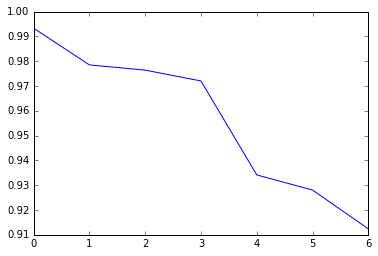

In [83]:
plot_silhouette_scores(X1)

### Q3. Clusters for features: q8,q9,q10

In [144]:
features = ['q8','q9','q10']
X2 = rows[features]

for col in features:
    col_mean = X2[col].replace([np.inf,-np.inf],np.nan).dropna().mean()
    c = X2[col].replace([np.inf,-np.inf],col_mean)
    X2[col] = c

/Users/Proxima/anaconda/envs/py35/lib/python3.5/site-packages/pandas/core/indexing.py:508: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


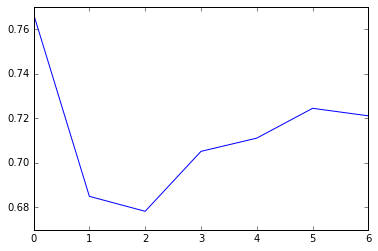

In [115]:
plot_silhouette_scores(X2)

### Q4. Clusters for features: q11,q12,13

In [23]:
X3 = rows[['q11','q12','q13']]

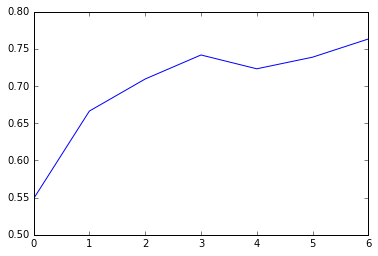

In [24]:
plot_silhouette_scores(X3)

### Q5. Inspect best clustering generated in Q4

In [29]:
# Best value of k=8 above
k_means_8 = KMeans(n_clusters=8).fit(X3)
k8_labels = k_means_8.labels_

clusters = {}
for label in k8_labels:
    try:
        clusters[label] += 1
    except:
        clusters[label] = 1

print (clusters)
# print (X3)

{0: 3264, 1: 2427, 2: 581, 3: 264, 4: 641, 5: 1251, 6: 1393, 7: 179}


In [31]:
for centroid in k8_centroids:
    print(centroid)    

[ -4.05009359e-13  -5.50670620e-14  -1.41398004e-12]
[  0.29314949   0.51767891  99.18917159]
[  3.38996485  41.57050591  55.03952924]
[  0.932095    97.0032869    2.06461811]
[ 48.77176497   2.09247259  49.13576245]
[ 24.23671051   8.30730793  67.45598155]
[ 30.98767756  28.83295082  40.17937162]
[ 98.67783985   0.37243948   0.94972067]


In [32]:
print (clusters[4])

641


### Q6. Clustering with k=5, q8-13,q15 & q17

In [116]:
features = ['q8','q9','q10','q11','q12','q13','q15','q17']
X4 = rows[features]
# remove rows with inf
# X4.replace([np.inf, -np.inf], np.nan).dropna
# X4['q8'].replace([np.inf,-np.inf],q8_mean)
# X4['q9'].replace([np.inf,-np.inf],q9_mean)
# X4['q10'].replace([np.inf,-np.inf],q10_mean)

for col in features:
    col_mean = X4[col].replace([np.inf,-np.inf],np.nan).dropna().mean()
    c = X4[col].replace([np.inf,-np.inf],col_mean)
    X4[col] = c

##### Calculate silhouette rating

In [117]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X4)
    
labels = kmeans.labels_
k5_centroids = kmeans.cluster_centers_
    
s = silhouette_score(X4,labels,metric='euclidean')
print (s)

0.512252203576


In [118]:
from statistics import mean

ratings = {}
for i in range(5):
    cluster_indices = X4[labels==i].index.values
    avg_star_ratings = mean([rows.ix[index]['q14'] for index in cluster_indices])
    ratings[i] = avg_star_ratings

print (ratings)

{0: 3.2045584248212555, 1: 3.9483960042218365, 2: 3.5625578597406951, 3: 2.8925802139037433, 4: 3.733616716736889}


### Q7

In [119]:
# create dataset
# import data
yelp_reviews = pd.read_csv('yelp_reviewers.txt',sep='|',header=0)
cols = ['q8','q9','q10','q11','q12','q13','q15','q17','q18-1','q18-2','q18-3','q18-4','q18-5','q18-6','q18-7','q18-8','q18-9','q18-10a','q18-10b','q18-10c','q18-10d','q18-10e','q18-10f','q18-10g','q18-10h']
# sample data
# rows = yelp_reviews.sample(10000)
rows = rows[cols]

In [120]:
# drop columns with high inf/-inf/nan values
for column in cols:
    df = rows[column]
    if (sum([0 if np.isnan(row) else 1 for row in df])) in range(0,100):
        cols.remove(column)

X5 = rows[cols]

#### Calculate silhouette metric 

In [ ]:
# replace all NaN by 0
X5.replace(np.nan,0)

for col in cols:
    col_mean = X5[col].replace([np.inf,-np.inf],np.nan).dropna().mean()
#     print(col_mean)
    c = X5[col].replace(np.inf,col_mean)
    X5[col] = c
# X5[isinf(X5)].stack()

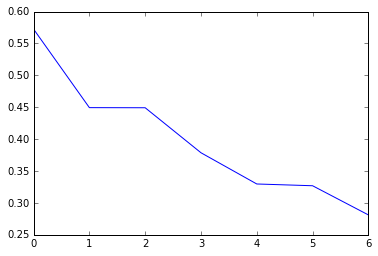

In [146]:
plot_silhouette_scores(X5)

#### Calculate sum of within-cluster variance metric

In [147]:
def plot_wcss_scores(data_set):
    s=[]
    for n_clusters in range(2,9):
        kmeans = KMeans(n_clusters=n_clusters)
        kmeans.fit(data_set)
    
        labels = kmeans.labels_
        centroids = kmeans.cluster_centers_
        c_interia = kmeans.inertia_
    
        s.append(c_interia)
        
    plt.plot(s)

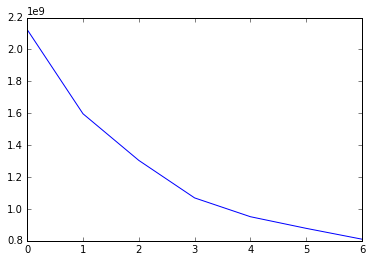

In [148]:
plot_wcss_scores(X5)